<a href="https://colab.research.google.com/github/scarebats/Machine-Learning-2025/blob/main/JS04_SOAL_KUIS1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [160]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [161]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [162]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [163]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [164]:
# Data Size
df.shape

(48842, 15)

In [165]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [166]:
# Jawab Soal 1

# Inspeksi Profile data
df.shape
df.info()

# Variabel yg hilang
df.isnull().sum()

# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [167]:
# Jawab Soal 2

# Imputation Pada data yg hilang
df['workclass'].fillna(value=df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(value=df['occupation'].mode()[0], inplace=True)
df['native-country'].fillna(value=df['native-country'].mode()[0], inplace=True)

# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

/tmp/ipython-input-3385622911.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].fillna(value=df['workclass'].mode()[0], inplace=True)
/tmp/ipython-input-3385622911.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [168]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [210]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
kualitatif = df.select_dtypes(include='object').columns
for col in kualitatif:
    display(df[col].value_counts())
    print("\n")

,count
workclass,
Private,34869
Self-emp-not-inc,3862
Local-gov,3136
State-gov,1981
?,1836
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


,count
education,
HS-grad,15784
Some-college,10878
Bachelors,8025
Masters,2657
Assoc-voc,2061
11th,1812
Assoc-acdm,1601
10th,1389
7th-8th,955


,count
marital-status,
Married-civ-spouse,22379
Never-married,16117
Divorced,6633
Separated,1530
Widowed,1518
Married-spouse-absent,628
Married-AF-spouse,37


,count
occupation,
Prof-specialty,7138
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
Transport-moving,2355
Handlers-cleaners,2072


,count
relationship,
Husband,19716
Not-in-family,12583
Own-child,7581
Unmarried,5125
Wife,2331
Other-relative,1506


,count
race,
White,41762
Black,4685
Asian-Pac-Islander,1519
Amer-Indian-Eskimo,470
Other,406


,count
native-country,
United-States,44106
Mexico,951
?,583
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151


# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


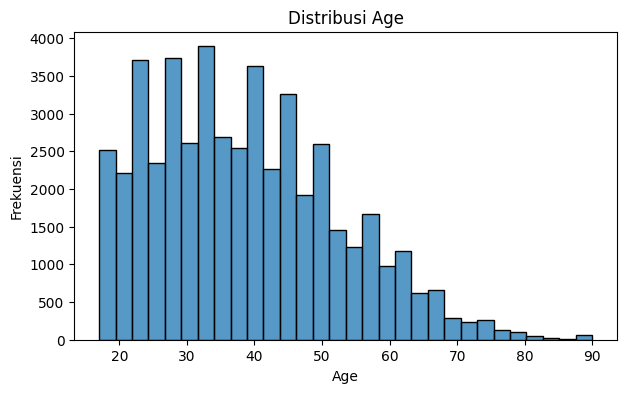

In [172]:
# Jawab 1.1 - Histrogram
plt.figure(figsize=(7, 4))
sns.histplot(df["age"], bins=30)
plt.title("Distribusi Age")
plt.xlabel("Age")
plt.ylabel("Frekuensi")
plt.show()

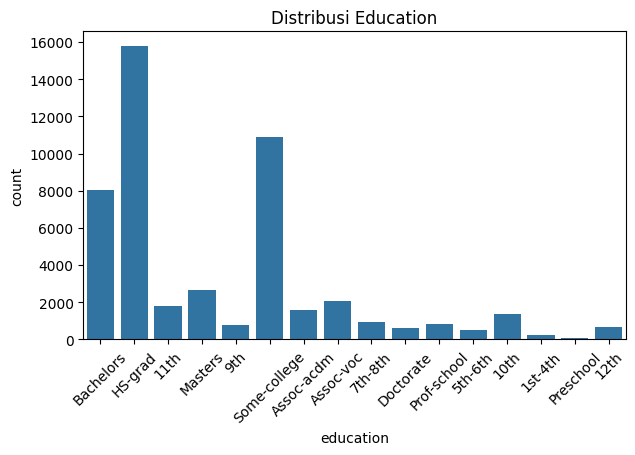

In [186]:
# Jawab 1.2 - Barchart
plt.figure(figsize=(7, 4))
sns.countplot(x="education", data=df)
plt.title("Distribusi Education")
plt.xticks(rotation=45)
plt.show()

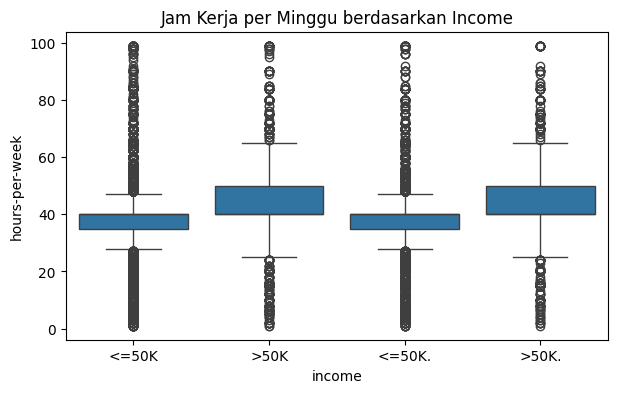

In [187]:
# Jawab 1.3 - Boxplot
plt.figure(figsize=(7, 4))
sns.boxplot(x="income", y="hours-per-week", data=df)
plt.title("Jam Kerja per Minggu berdasarkan Income")
plt.show()

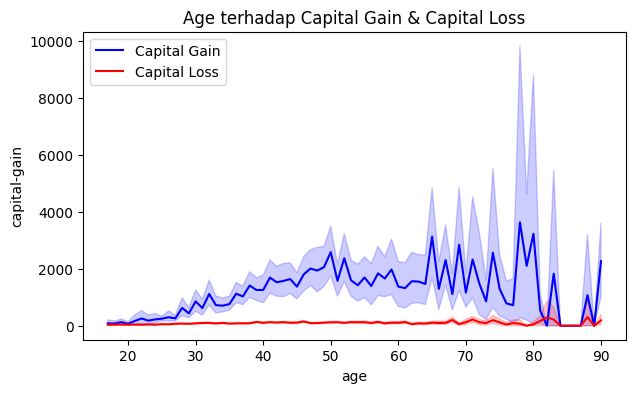

In [197]:
# Jawab 1.4 - Lineplot
plt.figure(figsize=(7, 4))
sns.lineplot(x="age", y="capital-gain", data=df, label="Capital Gain", color="blue")
sns.lineplot(x="age", y="capital-loss", data=df, label="Capital Loss", color="red")
plt.title("Age terhadap Capital Gain & Capital Loss")
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [203]:
# hitung outlier dengan IQR
def count(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return ((series < lower) | (series > upper)).sum()

outlier = df.groupby("income")["hours-per-week"].apply(count)
print(outlier)


income
<=50K     7809
<=50K.    3897
>50K       510
>50K.      271
Name: hours-per-week, dtype: int64


In [176]:
# Jawab dengan komentar python

'''
  1. Lebih banyak individu pada usia antara 20 - 50 dan semakin sedikit pada usia lanjut
  2. strategi median, karena berupa numerik
  3. Outlier pada kategori <=50K paling banyak dengan jumlah 7809
'''

'\n  Bisa dengan multiple comment\n  seperti ini\n'

# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [204]:
# Jawab Soal 1
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
display(df.head())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

In [206]:
# Jawab Soal 1

korelasi = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']
hasil = df[korelasi].corr()
display(hasil)

,age,education-num,hours-per-week,capital-gain,capital-loss,income
age,1.000000,0.030940,0.071558,0.077229,0.056944,0.230369
education-num,0.030940,1.000000,0.143689,0.125146,0.080972,0.332613
hours-per-week,0.071558,0.143689,1.000000,0.082157,0.054467,0.227687
capital-gain,0.077229,0.125146,0.082157,1.000000,-0.031441,0.223013
capital-loss,0.056944,0.080972,0.054467,-0.031441,1.000000,0.147554
income,0.230369,0.332613,0.227687,0.223013,0.147554,1.000000


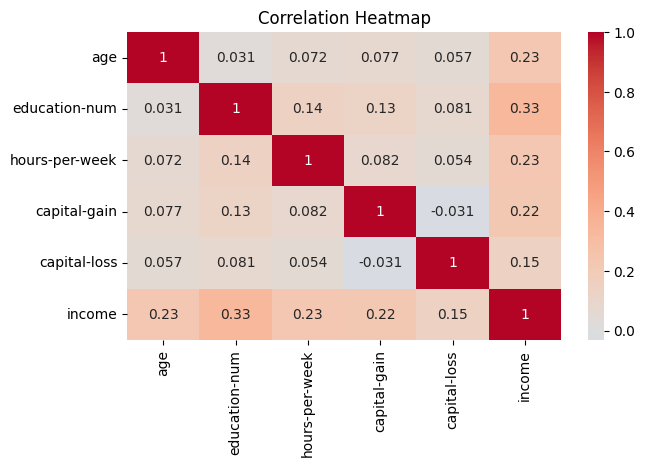

In [211]:
# Hasil analisis jelaskan pada cell ini
plt.figure(figsize=(7, 4))
sns.heatmap(hasil, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [208]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


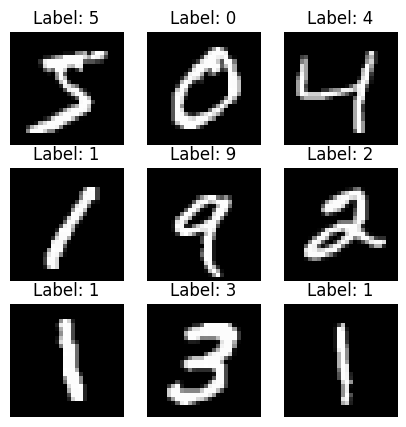

In [181]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

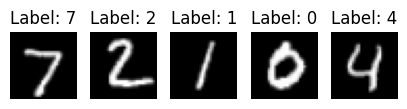

Shape upsampled: (10000, 32, 32)


In [214]:
# Jawab Soal 1
import cv2

upsampled = np.empty((X_test.shape[0], 32, 32), dtype=np.float32)

for i in range(X_test.shape[0]):
    upsampled[i] = cv2.resize(X_test[i], (32, 32), interpolation=cv2.INTER_LINEAR)

plt.figure(figsize=(5,5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(upsampled[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.show()

print("Shape upsampled:", upsampled.shape)

# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan


## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

Nilai piksel minimum setelah normalisasi: 0.0
Nilai piksel maksimum setelah normalisasi: 1.0


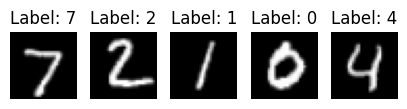

In [222]:
# Jawab Soal 2

normalized = upsampled / 255.0

print("Nilai piksel minimum setelah normalisasi:", normalized.min())
print("Nilai piksel maksimum setelah normalisasi:", normalized.max())

plt.figure(figsize=(5,5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(normalized[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.show()

# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [228]:
# Jawab Soal 2

flat = np.zeros((upsampled.shape[0], 32*32), dtype=np.float32)
for i in range(upsampled.shape[0]):
    flat[i] = upsampled[i].flatten()
print("Shape setelah flatten:", flat.shape)

for i in range(5):
    print(f"Data ke-{i}, label={y_test[i]}")
    print(flat[i][:10])

# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

Shape setelah flatten: (10000, 1024)
Data ke-0, label=7
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Data ke-1, label=2
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Data ke-2, label=1
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Data ke-3, label=0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Data ke-4, label=4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
